#### This is another well known dataset to do hands on *Image Classification * using Convolutional Neural Network (CNN).
#### CNN as a subset of *Deep Learning* uses *Convolution* instead of linear matrix operation. *Convolution* is a mathematical operation between 2 functions f(x) and g(x) expressing how the shape of one is modified by the other as f *o* g(x).

#### Import the libraries.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### See the files in the input directory.

In [2]:
print(os.listdir("../input/dogs-vs-cats/"))

['train.zip', 'test1.zip', 'sampleSubmission.csv']


In [3]:
os.listdir("../input/dogs-vs-cats/")[0]

'train.zip'

#### Unzip the 'train' zip file into a 'Temp' folder in /kaggle/working directory.

In [4]:
from zipfile import ZipFile
zf = ZipFile('../input/dogs-vs-cats/train.zip', 'r')
zf.extractall('../kaggle/working/Temp')
zf.close()

#### Check whether the Unzip has worked.

In [5]:
#Commented to reduce display...
#print(os.listdir("../kaggle/working/Temp/train"))

#### The filename of a cat's image will start with 'cat' and a dog's image will start with 'dog'. So using this feature create a dataframe with file names and their categories.
#### I took help for the following code block from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification.

In [6]:
filenames = os.listdir("../kaggle/working/Temp/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#### First few rows of the dataframe.

In [7]:
df.head()

,filename,category
0,dog.890.jpg,dog
1,dog.1178.jpg,dog
2,dog.7845.jpg,dog
3,dog.4632.jpg,dog
4,cat.3660.jpg,cat


#### Check the distibution of categories.

In [8]:
df['category'].value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

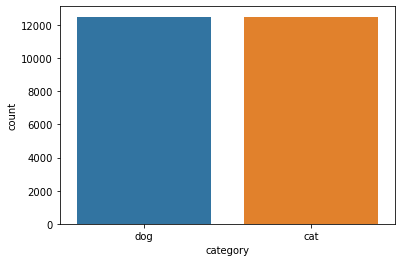

In [9]:
sns.countplot(x='category', data=df)

#### We can see that there are same number of images of each category.
#### We will now see a sample image from the 'train' set. Since each image has different dimension we will use a standard dimension of 128x128 which is a reduced version of the images' actual dimension.

In [10]:
filenames[0]

'dog.890.jpg'

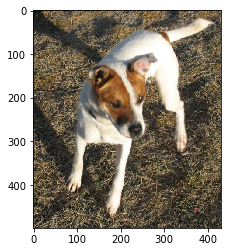

In [11]:
from tensorflow.keras.preprocessing import image
img = image.load_img("../kaggle/working/Temp/train/"+filenames[0])
plt.imshow(img)

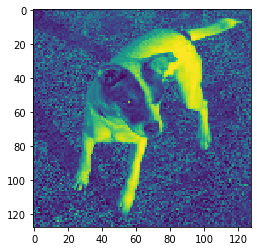

In [12]:
test_image = image.load_img("../kaggle/working/Temp/train/"+filenames[0], 
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
plt.imshow(test_image[:, :, 2])

#### Create a *validation set* with 20% images from the 'train' set.

In [13]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
val_data   = val_data.reset_index(drop=True)

#### Check first few lines from train dataset.

In [14]:
train_data.head()

,filename,category
0,dog.10381.jpg,dog
1,dog.1864.jpg,dog
2,cat.3131.jpg,cat
3,dog.12317.jpg,dog
4,dog.2524.jpg,dog


#### Check first few lines from validation dataset.

In [15]:
val_data.head()

,filename,category
0,dog.7293.jpg,dog
1,dog.1822.jpg,dog
2,dog.1683.jpg,dog
3,cat.3994.jpg,cat
4,dog.12248.jpg,dog


#### Check the distribution of category in train dataset.

In [16]:
train_data['category'].value_counts()

cat    10026
dog     9974
Name: category, dtype: int64

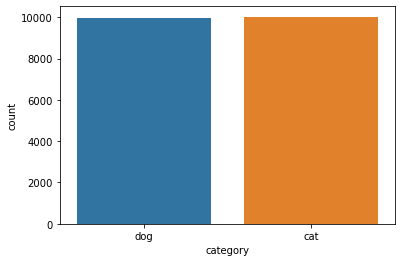

In [17]:
sns.countplot(x='category', data=train_data)

#### Check the distribution of category in validation dataset.

In [18]:
val_data['category'].value_counts()

dog    2526
cat    2474
Name: category, dtype: int64

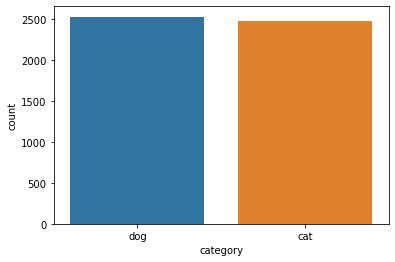

In [19]:
sns.countplot(x='category', data=val_data)

#### A CNN will have multiple layers of Convolution layers and then it will be fed into a fully connected network.

In our case we will have 2 layers of **Convolution Layers** and each will have below features -

1. **Filters**: The number of output filters in the convolution
2. **Kernel Size**: The height and width of the convolution window
3. **Strides**: The stride of the convolution
4. **Input Shape**: The first Convolution layer will have input shape of 128x128x3 (128x128 is the image size and 3 specifies the channel as 'RGB')

Then we have **Batch Normalization** and **Dropout** as measure to prevent over-fitting and increase balance.

**Max Pooling** reduces the dimension of the cluster from one layer to the next by using the maximum value.

**Flatten** is used to change the dimension so that the output of Convolutional layer can be fed into a fully connected layer.

We are going to use **ImageDataGenerator** to preprocess the images.

In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#### Build the model.

In [21]:
classifier = Sequential([Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3),
                            padding='valid', activation='relu'),
                         BatchNormalization(),
                         MaxPooling2D(pool_size=(2, 2)),
                         Dropout(0.2),
                         Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                            padding='valid', activation='relu'),
                         BatchNormalization(),
                         MaxPooling2D(pool_size=(2, 2)),
                         Dropout(0.2),
                         Flatten(),
                         Dense(512, activation='relu'),
                         BatchNormalization(),
                         Dropout(0.25),
                         Dense(2, activation='softmax')])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)       

#### Build the train_generator.

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
        train_data,
        "../kaggle/working/Temp/train/",
        x_col='filename',
        y_col='category',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 20000 validated image filenames belonging to 2 classes.


#### Build the validation_generator.

In [23]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
        val_data,
        "../kaggle/working/Temp/train/",
        x_col='filename',
        y_col='category',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 5000 validated image filenames belonging to 2 classes.


#### Early Stopping and Checkpoint

In [24]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#### Fit the data into model.

In [25]:
history=classifier.fit_generator(train_generator,
                                steps_per_epoch=625,
                                epochs=50,
                                validation_data=val_generator,
                                validation_steps=200,
                                callbacks=[es, mc])

Epoch 1/50
625/625 [==============================] - 240s 384ms/step - loss: 0.6890 - accuracy: 0.6577 - val_loss: 0.6709 - val_accuracy: 0.5918

Epoch 00001: val_accuracy improved from -inf to 0.59175, saving model to best_model.h5
Epoch 2/50
625/625 [==============================] - 233s 373ms/step - loss: 0.5507 - accuracy: 0.7231 - val_loss: 0.6201 - val_accuracy: 0.6882

Epoch 00002: val_accuracy improved from 0.59175 to 0.68821, saving model to best_model.h5
Epoch 3/50
625/625 [==============================] - 234s 374ms/step - loss: 0.5213 - accuracy: 0.7452 - val_loss: 0.6479 - val_accuracy: 0.7539

Epoch 00003: val_accuracy improved from 0.68821 to 0.75392, saving model to best_model.h5
Epoch 4/50
625/625 [==============================] - 236s 378ms/step - loss: 0.4841 - accuracy: 0.7683 - val_loss: 0.4313 - val_accuracy: 0.7111

Epoch 00004: val_accuracy did not improve from 0.75392
Epoch 5/50
625/625 [==============================] - 233s 373ms/step - loss: 0.4608 - acc


Epoch 00039: val_accuracy improved from 0.85414 to 0.85461, saving model to best_model.h5
Epoch 40/50
625/625 [==============================] - 253s 405ms/step - loss: 0.2706 - accuracy: 0.8880 - val_loss: 0.6689 - val_accuracy: 0.8323

Epoch 00040: val_accuracy did not improve from 0.85461
Epoch 41/50
625/625 [==============================] - 256s 409ms/step - loss: 0.2583 - accuracy: 0.8885 - val_loss: 0.7606 - val_accuracy: 0.7905

Epoch 00041: val_accuracy did not improve from 0.85461
Epoch 42/50
625/625 [==============================] - 266s 426ms/step - loss: 0.2710 - accuracy: 0.8864 - val_loss: 0.4528 - val_accuracy: 0.8463

Epoch 00042: val_accuracy did not improve from 0.85461
Epoch 43/50
625/625 [==============================] - 257s 412ms/step - loss: 0.2503 - accuracy: 0.8978 - val_loss: 0.6576 - val_accuracy: 0.7923

Epoch 00043: val_accuracy did not improve from 0.85461
Epoch 44/50
625/625 [==============================] - 256s 410ms/step - loss: 0.2604 - accuracy:

#### Plotting model accuracy.

In [26]:
history.history

{'val_loss': [0.6709161400794983,
  0.6201476454734802,
  0.6479384899139404,
  0.4313232898712158,
  0.2912929058074951,
  0.5912570357322693,
  0.4389576315879822,
  0.4058504104614258,
  0.3875119984149933,
  0.7760952115058899,
  0.6978983879089355,
  0.44293412566185,
  0.4065655469894409,
  0.5437098741531372,
  0.6068775653839111,
  0.3543775677680969,
  0.39200296998023987,
  0.40372124314308167,
  0.42550790309906006,
  0.5841682553291321,
  0.8231544494628906,
  0.6920019388198853,
  0.3244163393974304,
  1.2649519443511963,
  0.4515397548675537,
  0.3156251609325409,
  0.2561325430870056,
  0.23224729299545288,
  0.28008460998535156,
  0.09700697660446167,
  0.2901966869831085,
  0.4322611689567566,
  0.7288206815719604,
  0.3271045684814453,
  1.009860634803772,
  0.654324471950531,
  0.5597981214523315,
  0.33109283447265625,
  0.23121768236160278,
  0.6689396500587463,
  0.7605804204940796,
  0.4527915120124817,
  0.657555341720581,
  0.2838171124458313,
  0.8668814897537

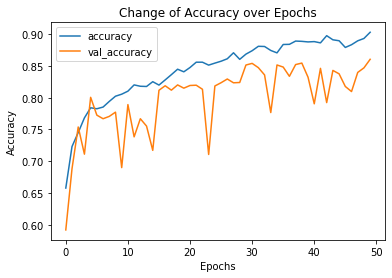

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

#### Plotting model loss.

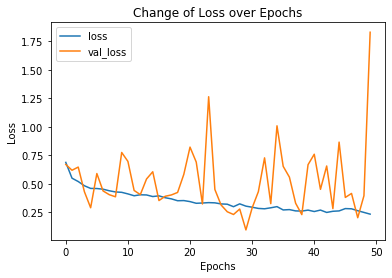

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

#### We have specified y_col='category' and class_mode='categorical'. So the 'ImageDataGenerator' will convert the 'category' column into 2D one-hot-encoded matrix and we can see the value assigned to each class of the 'category' column through 'class_indices'.

In [29]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

#### Unzip the 'test' set.

In [30]:
from zipfile import ZipFile
zf = ZipFile('../input/dogs-vs-cats/test1.zip', 'r')
zf.extractall('../kaggle/working/Temp')
zf.close()

#### Check whether the Unzip has worked.

In [31]:
#Commented to reduce display...
#print(os.listdir("../kaggle/working/Temp/test1"))

#### Create a dataframe for the test data.

In [32]:
filenames = os.listdir("../kaggle/working/Temp/test1")

test_data = pd.DataFrame({
    'filename': filenames
})

#### Load the best model.

In [33]:
from keras.models import load_model

saved_model = load_model('best_model.h5')

#### Use one sample image from test set and predict its class.

[1]


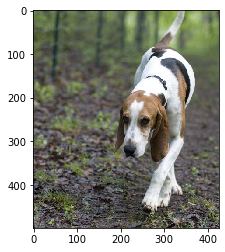

In [46]:
img = image.load_img("../kaggle/working/Temp/test1/"+filenames[29])
                            
test_image = image.load_img("../kaggle/working/Temp/test1/"+filenames[29], 
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
plt.imshow(img)
test_image = np.expand_dims(test_image, axis=0)
result = saved_model.predict(test_image)
print(np.argmax(result, axis=1))

#### We can see the class of the image is correctly predicted as '1' which means 'dog'.

[0]


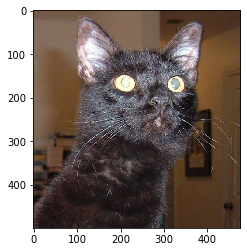

In [70]:
img = image.load_img("../kaggle/working/Temp/test1/"+filenames[39])
                            
test_image = image.load_img("../kaggle/working/Temp/test1/"+filenames[39], 
                            target_size=(128, 128))
test_image = image.img_to_array(test_image)
plt.imshow(img)
test_image = np.expand_dims(test_image, axis=0)
result = saved_model.predict(test_image)
print(np.argmax(result, axis=1))

#### We can see the class of the image is correctly predicted as '0' which means 'cat'.

#### Preprocess the images from test set.

In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        test_data,
        "../kaggle/working/Temp/test1/",
        x_col='filename',
        y_col=None,
        target_size=(128, 128),
        batch_size=32,
        class_mode=None)

Found 12500 validated image filenames.


#### Predict the classes of all the images from test set.

In [36]:
predict = saved_model.predict_generator(test_generator)
final_prediction = np.argmax(predict, axis=1)

#### Create the submission file.

In [71]:
predict_df = pd.DataFrame(final_prediction, columns=['label'])
submission_df = test_data.copy()
submission_df['id'] = (submission_df['filename'].str.split('.').str[0]).astype(int)
submission_df = pd.concat([submission_df, predict_df], axis=1)
submission_df = submission_df.drop(['filename'], axis=1)
submission_df = submission_df.sort_values(by=['id'])
submission_df = submission_df.reset_index(drop=True)
submission_df.to_csv('submission.csv', index=False)